In [127]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [129]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [130]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
# data (as pandas dataframes) 
# Se asigna las variables independientes a X y la variable dependiente a y
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 

dimensiones_X = X.shape
print(f'Dimensiones de las características (X): {dimensiones_X}')

# El modelo selecciona la ultima columa como target automaticamente?



{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [131]:
print(y)

               NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]


In [132]:
obesity=pd.DataFrame(X)
obesity_y=pd.DataFrame(y)

# agrego una columna en el dataset independiente 
obesity['target']=obesity_y

obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [133]:
sample_df = obesity.sample(n=10, random_state=42)
print(sample_df)

      Gender        Age    Height      Weight family_history_with_overweight  \
544   Female  20.406871  1.755978   53.699561                            yes   
1987  Female  26.000000  1.624950  111.004920                            yes   
420     Male  18.000000  1.850000   60.000000                            yes   
527   Female  21.000000  1.520000   42.000000                             no   
196     Male  22.000000  1.750000   74.000000                            yes   
744     Male  18.000000  1.738702   50.248677                            yes   
1635    Male  26.684354  1.819535  118.332689                            yes   
324   Female  30.000000  1.650000   71.000000                            yes   
1449  Female  23.099906  1.571812   78.997166                            yes   
634   Female  23.000000  1.710129   50.079991                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
544   yes  2.000000  3.891994  Frequently  

In [134]:
obesity.describe(include='object')
#generamos un resumen estadístico de las columnas que contengan datos de tipo object

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,target
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [135]:
obesity_temp=obesity.copy()
#obesity_temp.drop_duplicates(subset=['target'], inplace=True)
print(obesity_temp['target'].unique())

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [136]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

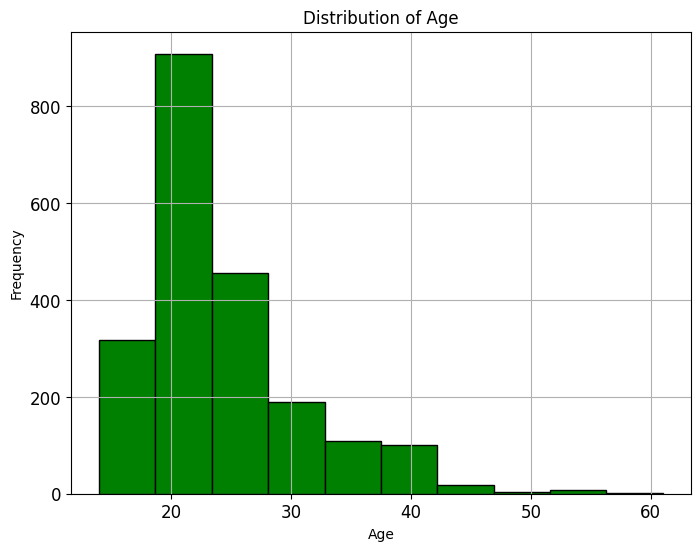

In [137]:
#obesity['Age'].hist()
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(8, 6))

# Plot the histogram with improved settings
obesity['Age'].hist(color='green', edgecolor='black')

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Increase the font size of labels and tick marks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a title
plt.title('Distribution of Age')

# Add gridlines
plt.grid(True)

# Show the improved plot
plt.show()

<Axes: >

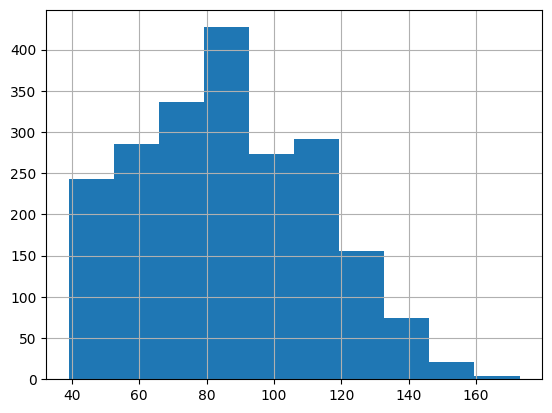

In [138]:
obesity['Weight'].hist()

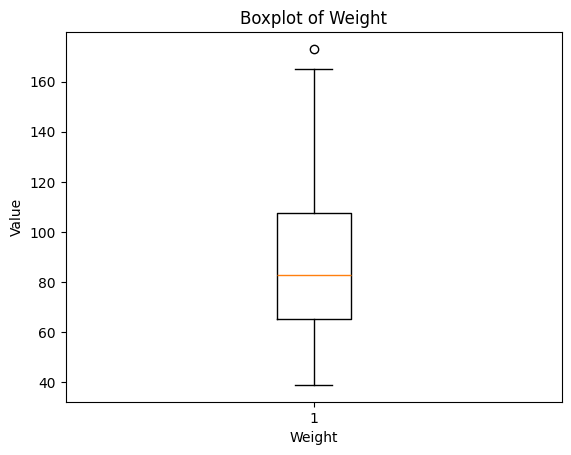

In [139]:
plt.boxplot(obesity['Weight'])
plt.xlabel('Weight')
plt.ylabel('Value')
plt.title('Boxplot of Weight')
plt.show()

Podemos ver una distribución bimodal, lo que significa que hay dos picos de concentraciones de pesos, uno de ellos alrededor de los 60 kg, mientras que el otro se cerca de los 80 kg, esto sugiere que la población puede estar compuesta por dos subgrupos con pesos predominantes menores a 70 kg y 80 kg, el promedio se ve en la línea amarilla. 


In [140]:
obesity['target'].value_counts()

target
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [141]:
# realizamos la codificación de la variable dependiente

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

obesity_y['NObeyesdad']=le.fit_transform(obesity_y['NObeyesdad'])
obesity_y['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [142]:
# Verficiamos la existencia de valores nulos en el dataset
isnull = obesity.isnull().sum()

Target encoder
Definición del plan de preprocesamiento. - ohe, ord o te

In [143]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

OHE_COLS=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
ORD_COLS=['CAEC','CALC','MTRANS']

# Instanciamos los objetos
ohe=OneHotEncoder()
ord=OrdinalEncoder()

# Hacemos el fit de los objetos con los datos

ohe.fit(obesity[OHE_COLS])
ord.fit(obesity[ORD_COLS])

# Hacemos la transformación de los datos

ohe_data=ohe.transform(obesity[OHE_COLS]).toarray()
ord_data=ord.transform(obesity[ORD_COLS])

# Hacemos un merge de los datos

obesity_data_cat=pd.concat([pd.DataFrame(ohe_data), pd.DataFrame(ord_data)], axis=1)

obesity_data_cat.head()

,0,1,2,3,4,5,6,7,8,9,0,1,2
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,3.0


In [144]:
# hacemos el fit_transform de las variables numéricas

from sklearn.preprocessing import StandardScaler, MinMaxScaler

SS_COLS=['FCVC','NCP','TUE']
MM_COLS=['Age','CH2O','FAF']

# Instanciamos los objetos

ss=StandardScaler()
mm=MinMaxScaler()

# Hacemos el fit de los objetos con los datos

ss.fit(obesity[SS_COLS])
mm.fit(obesity[MM_COLS])

# Hacemos la transformación de los datos

ss_data=ss.transform(obesity[SS_COLS])
mm_data=mm.transform(obesity[MM_COLS])

# Hacemos un merge de los datos

obesity_data_num=pd.concat([pd.DataFrame(ss_data), pd.DataFrame(mm_data)], axis=1)
obesity_data_num.columns=['FCVC','NCP','TUE','Age','CH2O','FAF']

obesity_data_num.head()


,FCVC,NCP,TUE,Age,CH2O,FAF
0,-0.785019,0.404153,0.561997,0.148936,0.5,0.000000
1,1.088342,0.404153,-1.080625,0.148936,1.0,1.000000
2,-0.785019,0.404153,0.561997,0.191489,0.5,0.666667
3,1.088342,0.404153,-1.080625,0.276596,0.5,0.666667
4,-0.785019,-2.167023,-1.080625,0.170213,0.5,0.000000


## Creación de Pipelines

Haremos un pipeline para el preprocesamiento de tosos estos datos usando lo que ya definimos.

In [145]:
## PIPELINE y COLUMN TRANSFORMER
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler, MinMaxScaler, LabelEncoder

### Los objetos que definimos son

imp_cat = SimpleImputer(strategy='constant',fill_value='?')
imp_num = SimpleImputer(strategy='mean')
ohe=OneHotEncoder(sparse_output=False)
ord=OrdinalEncoder()
ss=StandardScaler()
mm=MinMaxScaler()

cat_pipe_ohe=Pipeline(steps=[('imputer',imp_cat),
                             ('encoder',ohe)])

cat_pipe_ord=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',ord)])


num_pipe_ss=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',ss)])

num_pipe_mm=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',mm)])

# Hacemos un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe', cat_pipe_ohe, OHE_COLS),
        ('cat_ord', cat_pipe_ord, ORD_COLS),
        ('num_ss', num_pipe_ss, SS_COLS),
        ('num_mm', num_pipe_mm, MM_COLS)
    ])


In [146]:
preprocessor

ColumnTransformer(transformers=[('cat_ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC']),
                                ('cat_ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['CAEC', 'CALC', 'MTRANS']),
                                ('num_ss',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['FCVC', 'NCP', 'TUE']),
                                ('num_mm',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'CH2O', 'FAF'])])

In [147]:
## Data procesada
pd.set_option('display.max_columns', None)

data_processed_arr=preprocessor.fit_transform(obesity[OHE_COLS+ORD_COLS+SS_COLS+MM_COLS],obesity_y)

data_processed=pd.DataFrame(data_processed_arr)

data_processed.columns=preprocessor.transformers_[0][1]['encoder'].get_feature_names_out().tolist()+\
                        ORD_COLS+SS_COLS+MM_COLS

data_processed.head()

,x0_Female,x0_Male,x1_no,x1_yes,x2_no,x2_yes,x3_no,x3_yes,x4_no,x4_yes,CAEC,CALC,MTRANS,FCVC,NCP,TUE,Age,CH2O,FAF
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,-0.785019,0.404153,0.561997,0.148936,0.5,0.000000
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0,1.088342,0.404153,-1.080625,0.148936,1.0,1.000000
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,-0.785019,0.404153,0.561997,0.191489,0.5,0.666667
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,1.088342,0.404153,-1.080625,0.276596,0.5,0.666667
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,3.0,-0.785019,-2.167023,-1.080625,0.170213,0.5,0.000000


## Mejor xgboost

Para el modelo usaremos xgboost, que es un algoritmo de boosting muy popular y efectivo.

## Parametros de xgboost

Usaremos GridSearchCV para encontrar los mejores hiperparámetros para nuestro modelo.

- n_thread: número de hilos a utilizar para entrenar el modelo
- eta: tasa de aprendizaje
- max_depth: profundidad máxima de los árboles
- n_estimators: número de árboles a utilizar
- subsample: proporción de muestras a utilizar para entrenar cada árbol
- num_parallel_tree: número de árboles a entrenar en paralelo


In [148]:
## Definimos la lista de hiperparametros para el modelo xgboost

hiperparametros_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1,0.3,],
    'subsample': [0.5, 0.7, 0.9, 1],
    'reg_lambda': [0, 0.5, 1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1, 5, 10, 20, 50],
    'nthread': [4],
}

Definir el procesos de clasificación de un árbol de decisión con el dataset Obesity.

In [149]:
### Definimos el modelo de xgboost


from sklearn.model_selection import GridSearchCV

modelo_xgb=xgb.XGBClassifier()
modelo_xgb_grid = GridSearchCV(modelo_xgb, hiperparametros_xgb, cv=3, n_jobs=-1, verbose=2)

### Hacemos un split de los datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_processed, obesity_y, test_size=0.3, random_state=42)


modelo_xgb_grid

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 5, 10, 20, 50],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'nthread': [4], 'reg_lambda': [0, 0.5, 1],
                         'subsample': [0.5, 0.7, 0.9, 1]},
             verbose=2)

In [150]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parámetros de ejemplo para el grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# Inicializa el modelo XGBoost
modelo_xgb = xgb.XGBClassifier(tree_method='hist', use_label_encoder=False)

# Usa GridSearchCV con paralelización
modelo_xgb_grid = GridSearchCV(estimator=modelo_xgb, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Entrenamos el modelo
modelo_xgb_grid.fit(X_train, y_train)

# Predicción
y_pred = modelo_xgb_grid.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        86
           1       0.60      0.68      0.64        93
           2       0.81      0.81      0.81       102
           3       0.86      0.94      0.90        88
           4       1.00      0.99      0.99        98
           5       0.82      0.68      0.75        88
           6       0.79      0.67      0.73        79

    accuracy                           0.81       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.82      0.81      0.81       634



In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Supongo que `modelo_arbol` es un modelo de DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier()

# Define los hiperparámetros a buscar
hiperparametros_arbol = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Inicializa GridSearchCV con paralelización y configuración detallada de verbose
modelo_arbol_grid = GridSearchCV(estimator=modelo_arbol, param_grid=hiperparametros_arbol, cv=3, n_jobs=-1, verbose=2)

# Ajusta el modelo a los datos de entrenamiento
modelo_arbol_grid.fit(X_train, y_train)

# Obtiene y muestra los mejores hiperparámetros encontrados
mejores_hiperparametros = modelo_arbol_grid.best_params_
print("Mejores hiperparámetros: ", mejores_hiperparametros)

# Hacer predicciones con el modelo optimizado
y_pred = modelo_arbol_grid.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 160 candidates, totalling 480 fits
Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Matriz de Confusión:
[[68 13  0  0  0  4  1]
 [10 54  7  2  1  7 12]
 [ 2 10 67  5  0  6 12]
 [ 0  2  3 77  0  3  3]
 [ 0  1  0  0 97  0  0]
 [ 3 11 11  1  0 53  9]
 [ 1  8  8 10  0  7 45]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        86
           1       0.55      0.58      0.56        93
           2       0.70      0.66      0.68       102
           3       0.81      0.88      0.84        88
           4       0.99      0.99      0.99        98
           5       0.66      0.60      0.63        88
           6       0.55      0.57      0.56        79

    accuracy                           0.73       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.73      0.73      0.73       634


Exactitud del modelo: 72.71%


In [152]:
# Hacer predicciones con el modelo optimizado
for i in range(min(10, len(X_test))):  # Mostrar los primeros 10 ejemplos o hasta el tamaño de X_test
    print(f"Entrada: {X_test.iloc[i]}")
    print(f"Predicción: {y_pred[i]}")
    print(f"Etiqueta Real: {y_test.iloc[i]}\n")

accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo: {:.2f}%".format(accuracy * 100))


Entrada: x0_Female    1.000000
x0_Male      0.000000
x1_no        0.000000
x1_yes       1.000000
x2_no        0.000000
x2_yes       1.000000
x3_no        1.000000
x3_yes       0.000000
x4_no        1.000000
x4_yes       0.000000
CAEC         1.000000
CALC         3.000000
MTRANS       3.000000
FCVC        -0.785019
NCP          1.550889
TUE          2.204618
Age          0.136316
CH2O         0.431965
FAF          0.956709
Name: 544, dtype: float64
Predicción: 0
Etiqueta Real: NObeyesdad    0
Name: 544, dtype: int32

Entrada: x0_Female    1.000000
x0_Male      0.000000
x1_no        0.000000
x1_yes       1.000000
x2_no        0.000000
x2_yes       1.000000
x3_no        1.000000
x3_yes       0.000000
x4_no        1.000000
x4_yes       0.000000
CAEC         2.000000
CALC         2.000000
MTRANS       3.000000
FCVC         1.088342
NCP          0.404153
TUE         -0.550607
Age          0.255319
CH2O         0.852157
FAF          0.000000
Name: 1987, dtype: float64
Predicción: 4
Etiqueta 

In [153]:
X=X[OHE_COLS+ORD_COLS+SS_COLS+MM_COLS]
X

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS,FCVC,NCP,TUE,Age,CH2O,FAF
0,Female,yes,no,no,no,Sometimes,no,Public_Transportation,2.0,3.0,1.000000,21.000000,2.000000,0.000000
1,Female,yes,no,yes,yes,Sometimes,Sometimes,Public_Transportation,3.0,3.0,0.000000,21.000000,3.000000,3.000000
2,Male,yes,no,no,no,Sometimes,Frequently,Public_Transportation,2.0,3.0,1.000000,23.000000,2.000000,2.000000
3,Male,no,no,no,no,Sometimes,Frequently,Walking,3.0,3.0,0.000000,27.000000,2.000000,2.000000
4,Male,no,no,no,no,Sometimes,Sometimes,Public_Transportation,2.0,1.0,0.000000,22.000000,2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,no,no,Sometimes,Sometimes,Public_Transportation,3.0,3.0,0.906247,20.976842,1.728139,1.676269
2107,Female,yes,yes,no,no,Sometimes,Sometimes,Public_Transportation,3.0,3.0,0.599270,21.982942,2.005130,1.341390
2108,Female,yes,yes,no,no,Sometimes,Sometimes,Public_Transportation,3.0,3.0,0.646288,22.524036,2.054193,1.414209
2109,Female,yes,yes,no,no,Sometimes,Sometimes,Public_Transportation,3.0,3.0,0.586035,24.361936,2.852339,1.139107


In [158]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Cargar los datos de la base de datos "Obesity Levels Detection" del repositorio UCI
obesity_data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition

X = obesity_data.data.features
y = obesity_data.data.targets

# Mostrar las primeras filas del dataset
print(X.head())
print(y.head())

# Preprocesamiento de datos
# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada
X_reduced = pca.fit_transform(X_scaled)

# Hacer un split de los datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest con paralelización
rf = RandomForestClassifier(n_jobs=-1, random_state=42)  # n_jobs=-1 utiliza todos los núcleos disponibles

# Crear un pipeline para escalar los datos y aplicar PCA antes de entrenar el modelo
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Escalado de los datos
    ('pca', PCA(n_components=0.95)),  # Reducción de dimensionalidad con PCA
    ('classifier', rf)  # Modelo de Random Forest
])

# Hacer un fit del modelo
pipe.fit(X_train, y_train)

# Predicciones
y_pred = pipe.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

print(y_pred)


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
            NO

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8012618296529969
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.90      0.84        86
      Normal_Weight       0.64      0.51      0.56        93
     Obesity_Type_I       0.78      0.80      0.79       102
    Obesity_Type_II       0.88      0.95      0.92        88
   Obesity_Type_III       0.99      1.00      0.99        98
 Overweight_Level_I       0.75      0.72      0.73        88
Overweight_Level_II       0.71      0.72      0.72        79

           accuracy                           0.80       634
          macro avg       0.79      0.80      0.79       634
       weighted avg       0.80      0.80      0.80       634

['Insufficient_Weight' 'Obesity_Type_III' 'Insufficient_Weight'
 'Insufficient_Weight' 'Obesity_Type_II' 'Insufficient_Weight'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_II' 'Obesity_Typ

In [185]:
# Supongamos que tenemos la siguiente información para un individuo
# Reemplaza estos valores con los datos reales del individuo que deseas clasificar
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [24.0],
    'Height': [1.75],
    'Weight': [80.0],
    'family_history_with_overweight': ['yes'],
    'FAVC': ['no'],
    'FCVC': [2.0],
    'NCP': [3.0],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2.0],
    'SCC': ['no'],
    'FAF': [0.0],
    'TUE': [1.0],
    'CALC': ['no'],
    'MTRANS': ['Public_Transportation']
})

# Convertir variables categóricas en variables binarias
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Verificar y actualizar las columnas en new_data_encoded para que coincidan con X.columns
missing_columns = set(X.columns) - set(new_data_encoded.columns)
extra_columns = set(new_data_encoded.columns) - set(X.columns)

# Agregar columnas faltantes a new_data_encoded y establecer sus valores en 0
for col in missing_columns:
    new_data_encoded[col] = 0

# Eliminar columnas adicionales de new_data_encoded
new_data_encoded = new_data_encoded[X.columns]

# Escalar los nuevos datos utilizando el mismo scaler que se utilizó para entrenar el modelo
new_data_scaled = scaler.transform(new_data_encoded)

# Reducir la dimensionalidad de los nuevos datos utilizando el mismo PCA que se utilizó para entrenar el modelo
new_data_reduced = pca.transform(new_data_scaled)

# Realizar la predicción
prediction = pipe.predict(new_data_reduced)

# Imprimir el resultado de la predicción
if prediction[0] == 1:
    print("El individuo está clasificado como obeso.")
else:
    print("El individuo no está clasificado como obeso.")


El individuo no está clasificado como obeso.


In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()

# Perform cross-validation and calculate accuracy scores
scores1 = cross_val_score(model1, X_train, y_train, cv=5)
scores2 = cross_val_score(model2, X_train, y_train, cv=5)

# Calculate the mean accuracy scores
mean_score1 = scores1.mean()
mean_score2 = scores2.mean()

# Print the mean accuracy scores
print("DecisionTreeClassifier Mean Accuracy:", mean_score1)
print("RandomForestClassifier Mean Accuracy:", mean_score2)

# Compare the models
if mean_score1 > mean_score2:
    print("DecisionTreeClassifier performs better.")
else:
    print("RandomForestClassifier performs better.")


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: 

DecisionTreeClassifier Mean Accuracy: 0.7291777370590931
RandomForestClassifier Mean Accuracy: 0.8395327530920751
RandomForestClassifier performs better.


El modelo ha predicho correctamente que la persona en esta entrada específica no tiene obesidad. La alta exactitud del modelo sugiere que, en general, realiza predicciones precisas sobre el estado de obesidad de las personas en el conjunto de datos de prueba. Este nivel de exactitud indica un buen rendimiento del modelo, aunque la exactitud por sí sola no es suficiente para evaluar completamente un modelo de clasificación, y sería útil examinar otras métricas como la precisión, el recall y el f1-score para cada clase.

In [155]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define your models
model1 = RandomForestClassifier()
model2 = LogisticRegression()

# Perform cross-validation and calculate accuracy scores
scores_model1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
scores_model2 = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy scores
mean_score_model1 = scores_model1.mean()
mean_score_model2 = scores_model2.mean()

# Print the mean accuracy scores
print("Model 1 Accuracy:", mean_score_model1)
print("Model 2 Accuracy:", mean_score_model2)

# Compare the mean accuracy scores
if mean_score_model1 > mean_score_model2:
    print("Model 1 is better.")
else:
    print("Model 2 is better.")

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: 

Model 1 Accuracy: 0.8415735226752176
Model 2 Accuracy: 0.5646587265231333
Model 1 is better.


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):


Random Forest

In [156]:
### Desde el principio pero con Random Forest

# importar librerias

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Definimos las columnas

OHE_COLS=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
ORD_COLS=['CAEC','CALC','MTRANS']
SS_COLS=['FCVC','NCP','TUE']
MM_COLS=['Age','CH2O','FAF']

## Instanciamos los objetos
imp_cat = SimpleImputer(strategy='constant',fill_value='?')
imp_num = SimpleImputer(strategy='mean')
ohe=OneHotEncoder(sparse_output=False)
ord=OrdinalEncoder()
te=TargetEncoder()
ss=StandardScaler()
mm=MinMaxScaler()

at_pipe_ohe=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',ohe)])

cat_pipe_ord=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',ord)])

num_pipe_ss=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',ss)])

num_pipe_mm=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',mm)])

## Hacemos un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe', cat_pipe_ohe, OHE_COLS),
        ('cat_ord', cat_pipe_ord, ORD_COLS),
        ('num_ss', num_pipe_ss, SS_COLS),
        ('num_mm', num_pipe_mm, MM_COLS)
    ])

## Definimos la lista de hiperparametros de random forest

hiperparametros_rf={'n_estimators': [100,200,300],
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [ 5, 10,  20,  30],
                    'min_samples_split': [10,20,30,40],
                    'min_samples_leaf': [5,10,20,30]}

### Definimos el modelo de random forest

modelo_rf=RandomForestClassifier()

modelo_rf_grid=GridSearchCV(modelo_rf,hiperparametros_rf,cv=5)

## Pipeline

pipe=Pipeline(steps=[('preprocessor',preprocessor),
                        ('modelo',modelo_rf_grid)])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='?',
                                                                                 strategy='const...
                                                  ['FCVC', 'NCP', 'TUE']),
                                                 ('num_mm',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'CH2O', 'FAF'])])),
                ('modelo',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5, 10, 20, 30],
                                          'min_samples_leaf': [5, 10, 20, 30],
                                          'min_samples_split': [10, 20, 30, 40],
                                          'n_estimators': [100, 200, 300]}))])

          FCVC       NCP       TUE       Age      CH2O       FAF  Cluster
0    -0.785019  0.404153  0.561997  0.148936  0.500000  0.000000        1
1     1.088342  0.404153 -1.080625  0.148936  1.000000  1.000000        2
2    -0.785019  0.404153  0.561997  0.191489  0.500000  0.666667        3
3     1.088342  0.404153 -1.080625  0.276596  0.500000  0.666667        5
4    -0.785019 -2.167023 -1.080625  0.170213  0.500000  0.000000        0
...        ...       ...       ...       ...       ...       ...      ...
2106  1.088342  0.404153  0.407996  0.148443  0.364070  0.558756        5
2107  1.088342  0.404153 -0.096251  0.169850  0.502565  0.447130        5
2108  1.088342  0.404153 -0.019018  0.181362  0.527097  0.471403        5
2109  1.088342  0.404153 -0.117991  0.220467  0.926170  0.379702        2
2110  1.088342  0.404153  0.092432  0.205632  0.931757  0.342151        2

[2111 rows x 7 columns]


<Figure size 1200x1200 with 0 Axes>

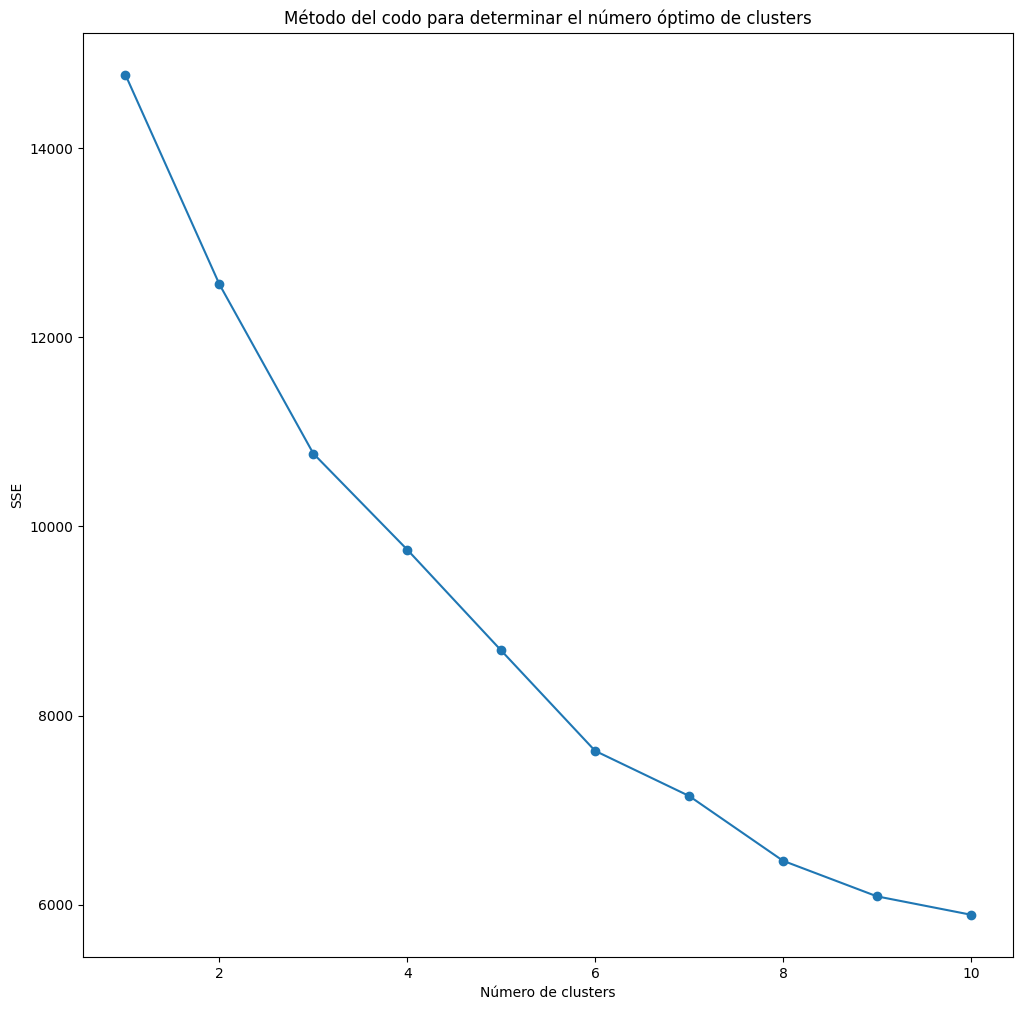

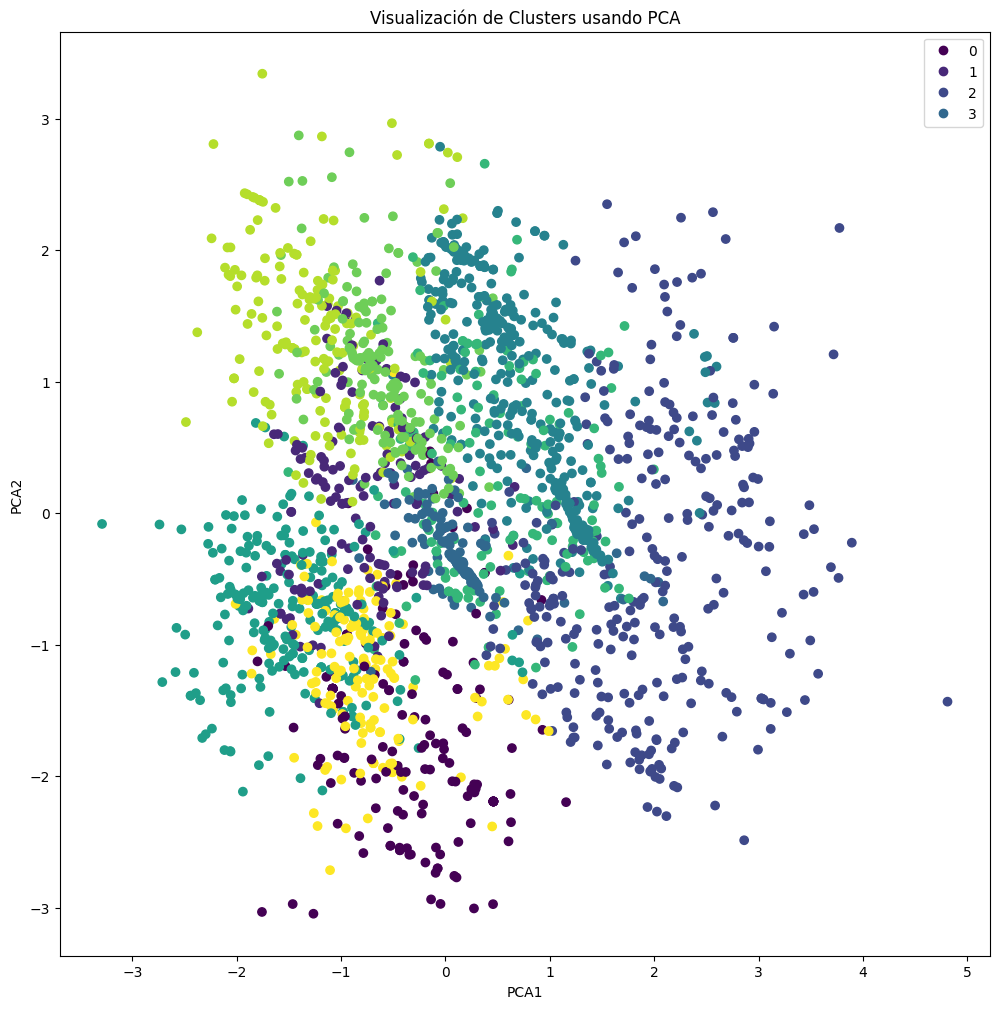

In [ ]:
import numpy as np
import matplotlib

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

# Genera datos de ejemplo
data = obesity_data_num

print(data)

caler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determinar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=170)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    
# Graficar el método del codo
plt.figure(figsize=(12, 12))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

# Basado en el gráfico del codo, seleccionamos un número de clusters
# Aquí seleccionamos 4 clusters como ejemplo, pero ajusta según el gráfico del codo
kmeans = KMeans(n_clusters=10, random_state=170)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

# Añadir la columna de clusters al dataframe original
data['Cluster'] = clusters

# Visualizar los clusters
# Usamos PCA para reducir a 2 dimensiones para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 12))
scatter = plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(4))
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

       FCVC       NCP       TUE       Age  CH2O       FAF  Cluster
0 -0.785019  0.404153  0.561997  0.148936   0.5  0.000000        3
1  1.088342  0.404153 -1.080625  0.148936   1.0  1.000000        1
2 -0.785019  0.404153  0.561997  0.191489   0.5  0.666667        1
3  1.088342  0.404153 -1.080625  0.276596   0.5  0.666667        2
4 -0.785019 -2.167023 -1.080625  0.170213   0.5  0.000000        0


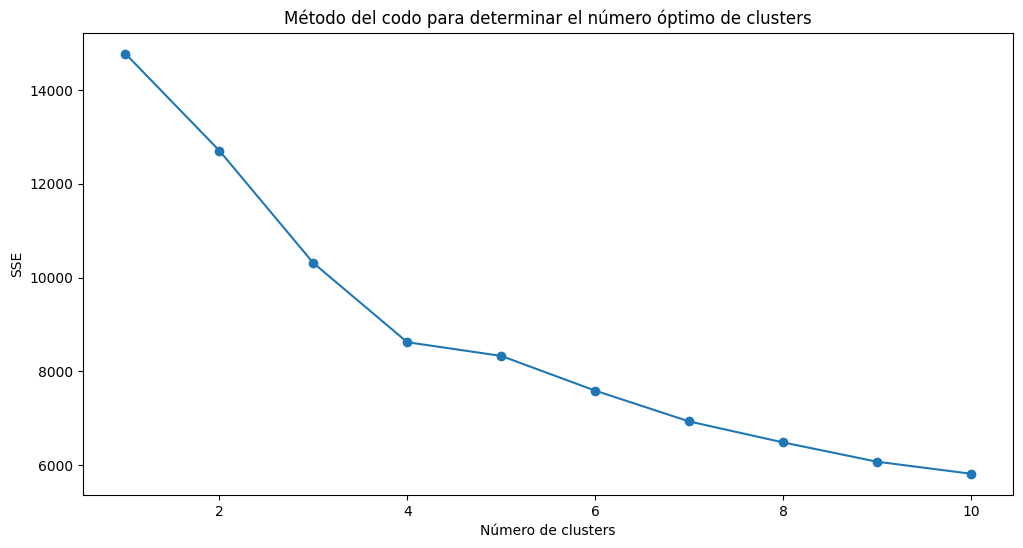

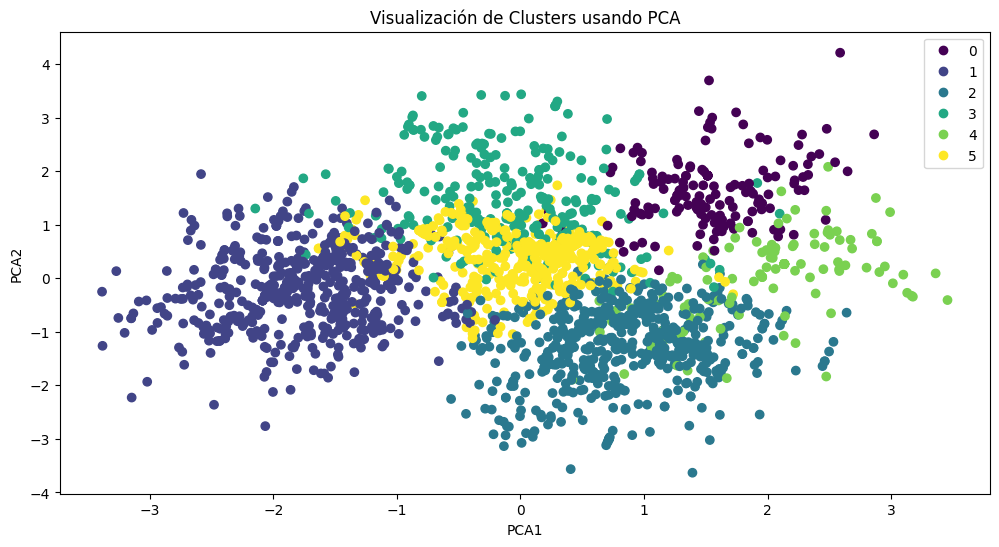

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar los datos
data2 = obesity_data_num

# Mostrar las primeras filas del dataset
print(data2.head())

# Preprocesamiento de datos
# Eliminar cualquier fila con valores faltantes
data2.dropna(inplace=True)

# Convertir variables categóricas a numéricas
data2 = pd.get_dummies(data, drop_first=True)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determinar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=170)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

# Basado en el gráfico del codo, seleccionamos un número de clusters
# Aquí seleccionamos 4 clusters como ejemplo, pero ajusta según el gráfico del codo
optimal_clusters = 6  # Ajusta este número según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=170)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

# Añadir la columna de clusters al dataframe original
data['Cluster'] = clusters

# Visualizar los clusters
# Usamos PCA para reducir a 2 dimensiones para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 6))
scatter = plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(optimal_clusters))
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


Cluster 1 coefficients:
Data point 1: 2.1089790887824327
Data point 2: 1.4650406113080714
Data point 3: 1.7346547015569962
Data point 4: 3.1967148533488166
Data point 5: 4.063133526395719
Data point 6: 3.643957984450913
Data point 7: 3.1979027681964283
Data point 8: 2.1833533744224076
Data point 9: 0.4778519999119062
Data point 10: 2.05155321659405
Data point 11: 2.058428571054046
Data point 12: 1.735080022294499
Data point 13: 1.3922789259185877
Data point 14: 1.9936563826867764
Data point 15: 3.0106862423701295
Data point 16: 0.4609751666369097
Data point 17: 4.0748024382584225
Data point 18: 4.065227042940855
Data point 19: 2.11550007084415
Data point 20: 4.06309843245048
Data point 21: 2.6573347429362295
Data point 22: 3.7546674905060065
Data point 23: 3.1979473567239567
Data point 24: 5.043329630474472
Data point 25: 2.1089790887824327
Data point 26: 2.891232266462409
Data point 27: 3.9220989141990055
Data point 28: 2.0744966840208674
Data point 29: 0.6523026811414976
Data point 3

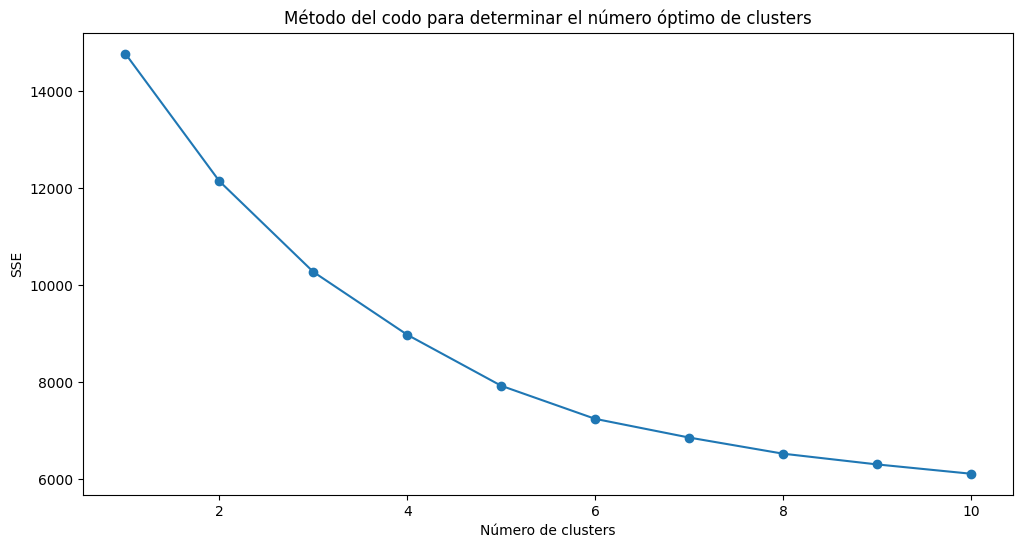

Número de puntos con coeficientes significativamente altos: 201
          FCVC       NCP       TUE       Age      CH2O       FAF  Cluster  \
13   -0.785019  0.404153  0.561997  0.574468  0.500000  0.666667        2   
21    1.088342 -2.167023 -1.080625  0.808511  0.500000  0.000000        0   
23   -2.658379 -2.167023  2.204618  0.170213  0.500000  0.000000        1   
25   -0.785019  1.689740  2.204618  0.127660  0.500000  1.000000        3   
30   -2.658379  1.689740  0.561997  0.319149  1.000000  0.000000        1   
...        ...       ...       ...       ...       ...       ...      ...   
1699  0.128771  1.376026 -1.080625  0.549481  0.000000  0.620255        2   
1720 -2.531161  1.248014 -1.080625  0.350025  0.492295  0.018079        1   
1721 -0.202870  0.687215 -1.080625  0.565202  0.003321  0.386013        2   
1781  0.200152 -0.829263 -1.041269  0.419627  0.000000  0.556787        0   
1782  0.594987 -0.861283 -0.988061  0.393967  0.000000  0.659306        0   

      Clust

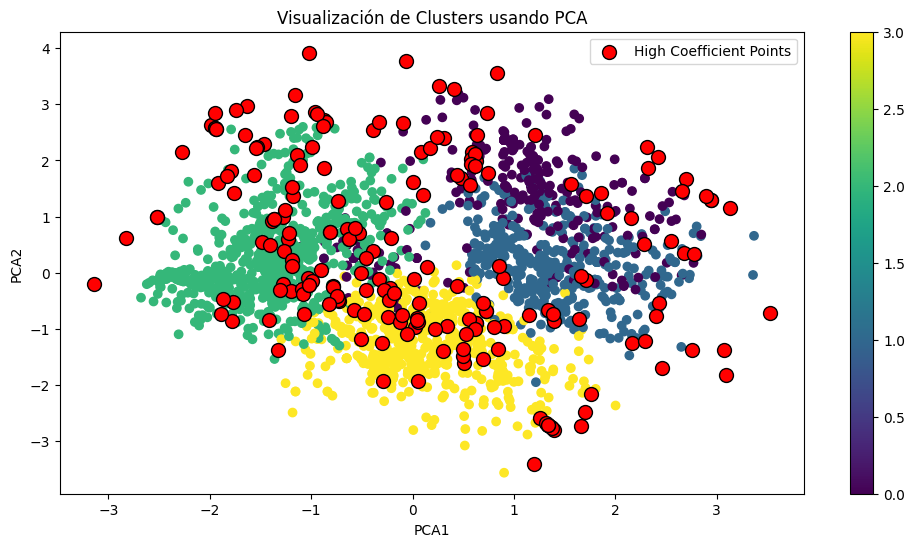

In [ ]:

from sklearn.cluster import KMeans

# Assuming you have your data stored in a variable called 'data'
# You can replace 'data' with your own data variable
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters you want

# Fit the KMeans model to your data
kmeans.fit(data)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the coefficients for each cluster
coefficients = kmeans.transform(data)

# Print the coefficients for each cluster
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} coefficients:")
    for j, coefficient in enumerate(coefficients[:, i]):
        print(f"Data point {j+1}: {coefficient}")
    print()
    
# Preprocesamiento de datos
# Eliminar cualquier fila con valores faltantes
data.dropna(inplace=True)

# Convertir variables categóricas a numéricas
data = pd.get_dummies(data, drop_first=True)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determinar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=170)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

# Basado en el gráfico del codo, seleccionamos un número de clusters
# Aquí seleccionamos 4 clusters como ejemplo, pero ajusta según el gráfico del codo
optimal_clusters = 4  # Ajusta este número según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=170)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

# Añadir la columna de clusters al dataframe original
data['Cluster'] = clusters

# Calcular los coeficientes de cada punto (distancia al centroide del cluster)
distances = kmeans.transform(data_scaled)
data['Cluster_Distance'] = distances[np.arange(len(distances)), clusters]

# Definir un umbral para considerar un coeficiente significativamente alto
threshold = np.percentile(data['Cluster_Distance'], 90)  # Puedes ajustar el percentil

# Filtrar los puntos con coeficientes significativamente altos
high_coef_points = data[data['Cluster_Distance'] > threshold]

print(f'Número de puntos con coeficientes significativamente altos: {len(high_coef_points)}')
print(high_coef_points)

# Visualizar los puntos con coeficientes significativamente altos usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = clusters
data_pca_df['Cluster_Distance'] = data['Cluster_Distance']

plt.figure(figsize=(12, 6))
scatter = plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Marcar los puntos con coeficientes significativamente altos
plt.scatter(data_pca_df.loc[data['Cluster_Distance'] > threshold, 'PCA1'],
            data_pca_df.loc[data['Cluster_Distance'] > threshold, 'PCA2'],
            color='red', edgecolor='k', s=100, label='High Coefficient Points')

plt.legend()
plt.show()

Número de puntos con coeficientes significativamente altos: 201
          FCVC       NCP       TUE       Age      CH2O       FAF  Cluster  \
13   -0.785019  0.404153  0.561997  0.574468  0.500000  0.666667        2   
21    1.088342 -2.167023 -1.080625  0.808511  0.500000  0.000000        0   
23   -2.658379 -2.167023  2.204618  0.170213  0.500000  0.000000        1   
25   -0.785019  1.689740  2.204618  0.127660  0.500000  1.000000        3   
30   -2.658379  1.689740  0.561997  0.319149  1.000000  0.000000        1   
...        ...       ...       ...       ...       ...       ...      ...   
1699  0.128771  1.376026 -1.080625  0.549481  0.000000  0.620255        2   
1720 -2.531161  1.248014 -1.080625  0.350025  0.492295  0.018079        1   
1721 -0.202870  0.687215 -1.080625  0.565202  0.003321  0.386013        2   
1781  0.200152 -0.829263 -1.041269  0.419627  0.000000  0.556787        0   
1782  0.594987 -0.861283 -0.988061  0.393967  0.000000  0.659306        0   

      Clust

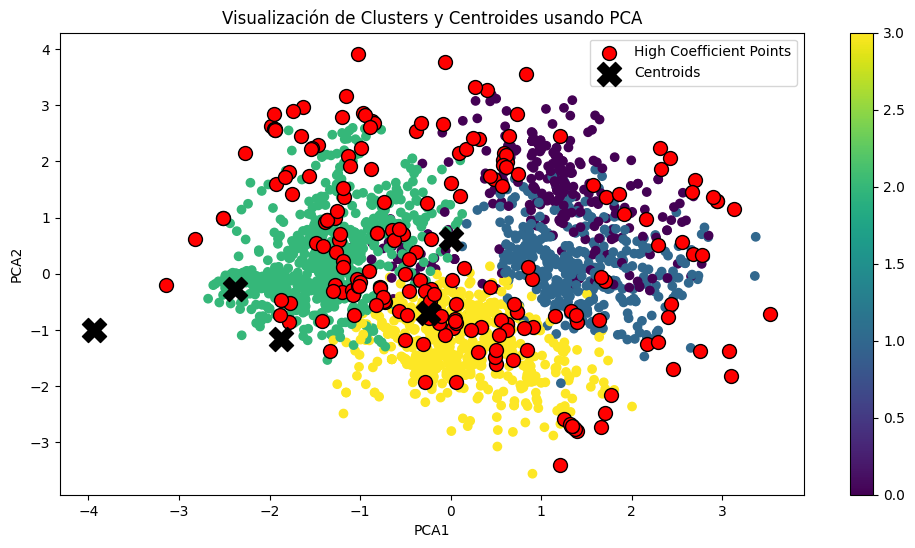

In [ ]:
# Calcular los coeficientes de cada punto (distancia al centroide del cluster)
distances = kmeans.transform(data_scaled)
data['Cluster_Distance'] = distances[np.arange(len(distances)), clusters]

# Definir un umbral para considerar un coeficiente significativamente alto
threshold = np.percentile(data['Cluster_Distance'], 90)  # Puedes ajustar el percentil

# Filtrar los puntos con coeficientes significativamente altos
high_coef_points = data[data['Cluster_Distance'] > threshold]

print(f'Número de puntos con coeficientes significativamente altos: {len(high_coef_points)}')
print(high_coef_points)

# Visualizar los puntos con coeficientes significativamente altos usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
centroids_pca = pca.transform(centroids)  # Transformar los centroides también

data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = clusters
data_pca_df['Cluster_Distance'] = data['Cluster_Distance']

plt.figure(figsize=(12, 6))
scatter = plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización de Clusters y Centroides usando PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Marcar los puntos con coeficientes significativamente altos
plt.scatter(data_pca_df.loc[data['Cluster_Distance'] > threshold, 'PCA1'],
            data_pca_df.loc[data['Cluster_Distance'] > threshold, 'PCA2'],
            color='red', edgecolor='k', s=100, label='High Coefficient Points')

# Marcar los centroides
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.legend()
plt.show()